In [4]:
from keras import models
from keras.layers import Dense,Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from keras.utils.vis_utils import model_to_dot
import livelossplot

In [6]:
plot_losses = livelossplot.PlotLossesKeras()

%matplotlib inline

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

In [7]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


In [8]:
X_train = X_train.reshape((X_train.shape[0],NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test= X_test.reshape((X_test.shape[0],NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

In [9]:
y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)

In [10]:
model = models.Sequential()
model.add(Dense(512,activation = 'relu',input_shape = (NUM_ROWS * NUM_COLS,)))
model.add(Dropout(0.5))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation = 'softmax'))

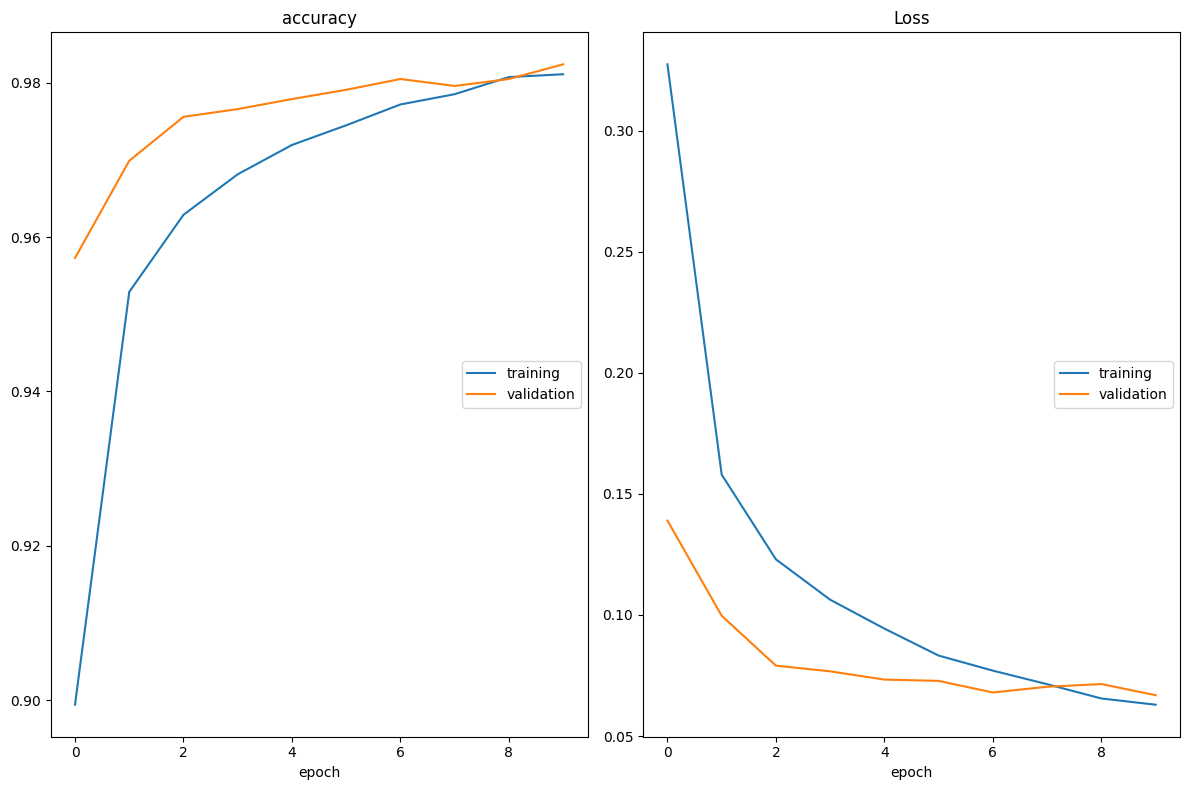

accuracy
	training         	 (min:    0.899, max:    0.981, cur:    0.981)
	validation       	 (min:    0.957, max:    0.982, cur:    0.982)
Loss
	training         	 (min:    0.063, max:    0.327, cur:    0.063)
	validation       	 (min:    0.067, max:    0.139, cur:    0.067)
469/469 [==============================] - 4s 8ms/step - loss: 0.0629 - accuracy: 0.9811 - val_loss: 0.0669 - val_accuracy: 0.9824
test loss:  0.06688705086708069
test accuracy 0.9824000000953674


In [11]:
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train,y_train,batch_size = BATCH_SIZE,epochs = EPOCHS,callbacks = [plot_losses],verbose = 1,validation_data = (X_test,y_test))

score = model.evaluate(X_test,y_test,verbose = 0)
print('test loss: ',score[0])
print('test accuracy',score[1])

In [14]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Activation,Flatten,Dropout,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

In [15]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch >100:
        lrate = 0.003
    return lrate

In [17]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [18]:
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis = (0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [25]:
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [28]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',kernel_regularizer = regularizers.12(weight_decay),input_shape = x_train.shape[1:]))
model.add(Activation('elu'))
moBatchNormalizationdd(BatchNormalization())
model.add(Conv2D(32,(3,3),padding = 'same',kernel_regularizer = regularizers.12(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),padding = 'same',kernel_regularizer = regularizers.12(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding = 'same',kernel_regularizer = regularizers.12(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),padding = 'same',kernel_regularizer = regularizers.12(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding = 'same',kernel_regularizer = regularizers.12(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes,activation ='softmax'))

model.summary()

SyntaxError: invalid syntax (302859119.py, line 3)

In [30]:
datagen = ImageDataGenerator(
rotation_range = 15,
width_shift_range = 0.1,
height_shift_range = 0.1,
horizontal_flip = True,)
datagen.fit(x_train)

In [31]:
batch_size = 64

opt_rms = keras.optimizers.RMSprop(lr = 0.001,decay = 1e-6)
model.compile(optimizer = opt_rms,loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit_generator(datagen.flow(x_train,y_train,batch_size = batch_size),\
                    steps_per_epoch = x_train.shape[0]//batch_size,epochs = 30, \
                    callbacks = [LearningRateScheduler(lr_schedule)],verbose = 1,validation_data = (x_test,y_test))

model_json = model.to_json()
with open('model.json','w') as json_file:
    json.file.write(model_json)
model.save_weights('model.h5')

scores = model.evaluate(x_test,y_test,batch_size = 128,verbose = 1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\sumit0069\AppData\Local\Temp\ipykernel_38572\3967386017.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train,y_train,batch_size = batch_size),\


Epoch 1/30


ValueError: in user code:

    File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, None) and (None, None, None, 10) are incompatible


In [32]:
from matplotlib import pyplot
from matplotlib.pyplot import imshow
from keras.datasets import cifar10
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pyplot.subplot2grid((4,4),(i,j))
            pyplot.imshow((X[k]))
            k = k + 1
    pyplot.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

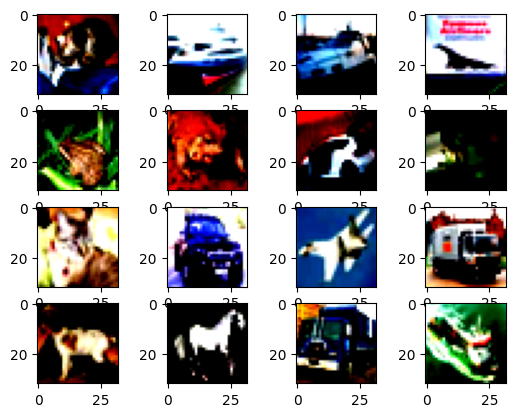

FileNotFoundError: [Errno 2] No such file or directory: 'model.json'

In [36]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis = (0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

show_imgs(x_test[:16])

json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()

from keras.models import model_from_json
model = model_from_json(loaded_model_json)
model.load_weights("model.h5")

labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

indices = np.argmax(model.predict(x_test[:16]),1)
print([labels[x]for x in indices])